# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

### **Penjelasan Dataset yang saya gunakan**

Saya menggunakan dataset **Beverage Sales** yang disediakan oleh **Dicoding**. Dataset aslinya memiliki **8.999.910 baris**, tetapi untuk meningkatkan efisiensi eksekusi program, saya mengambil **8.000 baris secara acak**. Langkah ini diambil agar program dapat dieksekusi dengan lebih efisien tanpa mengurangi keragaman data yang ada.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("Dataset_clustering.csv")
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1. Memahami Struktur Data**

In [3]:
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       8000 non-null   object 
 1   Customer_ID    8000 non-null   object 
 2   Customer_Type  8000 non-null   object 
 3   Product        8000 non-null   object 
 4   Category       8000 non-null   object 
 5   Unit_Price     8000 non-null   float64
 6   Quantity       8000 non-null   int64  
 7   Discount       8000 non-null   float64
 8   Total_Price    8000 non-null   float64
 9   Region         8000 non-null   object 
 10  Order_Date     8000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 687.6+ KB


(8000, 11)

In [4]:
df.dtypes

,0
Order_ID,object
Customer_ID,object
Customer_Type,object
Product,object
Category,object
Unit_Price,float64
Quantity,int64
Discount,float64
Total_Price,float64
Region,object


**2. Menangani Data yang Hilang**

In [5]:
print(df.isnull().sum())

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


In [6]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [7]:
df.describe(include="all")

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
count,8000,8000,8000,8000,8000,8000.000000,8000.000000,8000.000000,8000.000000,8000,8000
unique,7995,5516,2,47,4,NaN,NaN,NaN,NaN,16,1094
top,ORD2318730,CUS8633,B2C,Mango Juice,Water,NaN,NaN,NaN,NaN,Hamburg,2021-11-15
freq,2,6,5188,321,2036,NaN,NaN,NaN,NaN,570,17
mean,NaN,NaN,NaN,NaN,NaN,5.830726,22.653875,0.029319,132.063190,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.963752,26.492203,0.044676,511.130779,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.330000,1.000000,0.000000,0.350000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.040000,6.000000,0.000000,8.320000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.750000,11.000000,0.000000,20.550000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.160000,28.000000,0.050000,67.842500,NaN,NaN


**3. Analisis Distribusi dan Korelasi**

In [8]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

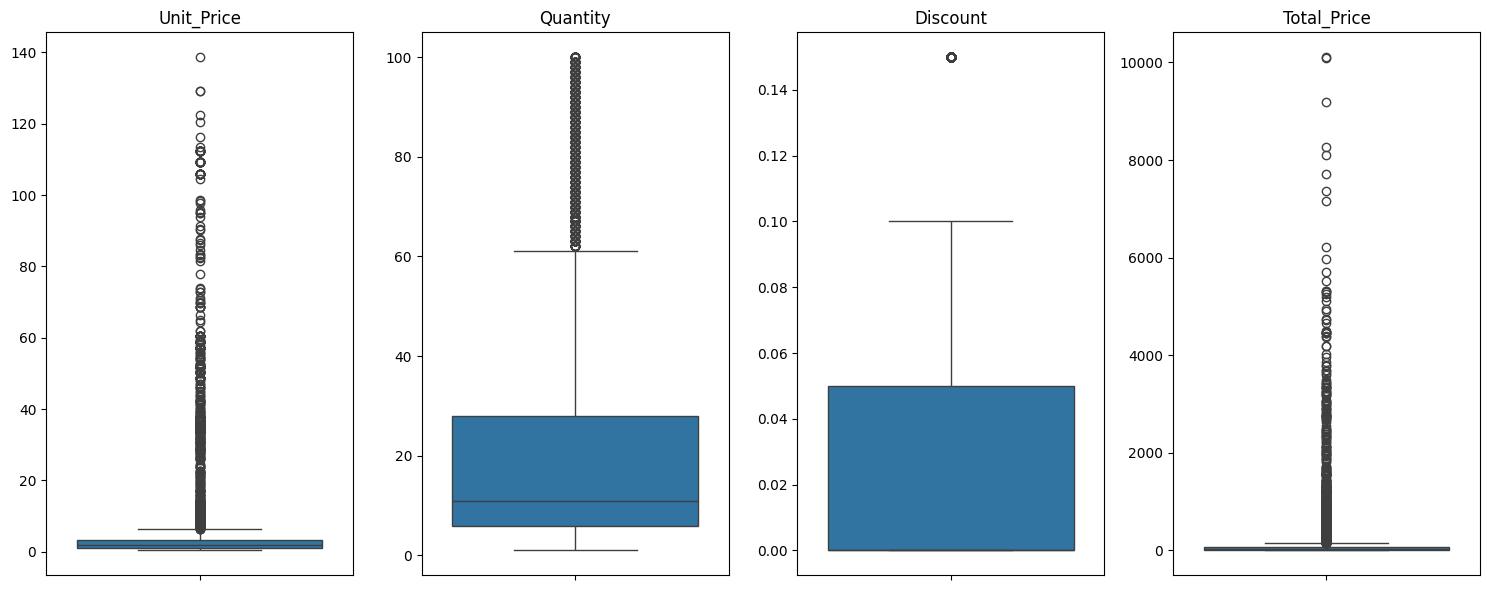

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(15, 6))

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

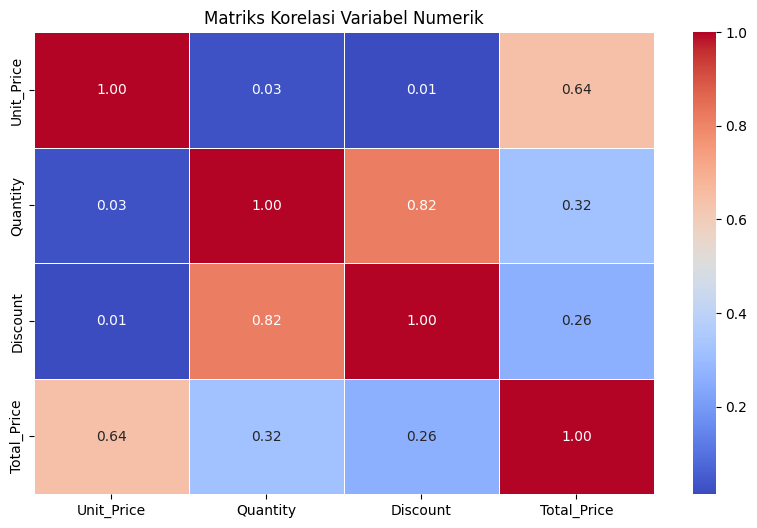

In [10]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

**4. Visualisasi Data**

<ipython-input-11-4e6fd59c798b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=axes[i])
<ipython-input-11-4e6fd59c798b>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(value_counts.index, rotation=45, ha="right")
<ipython-input-11-4e6fd59c798b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=axes[i])
<ipython-input-11-4e6fd59c798b>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

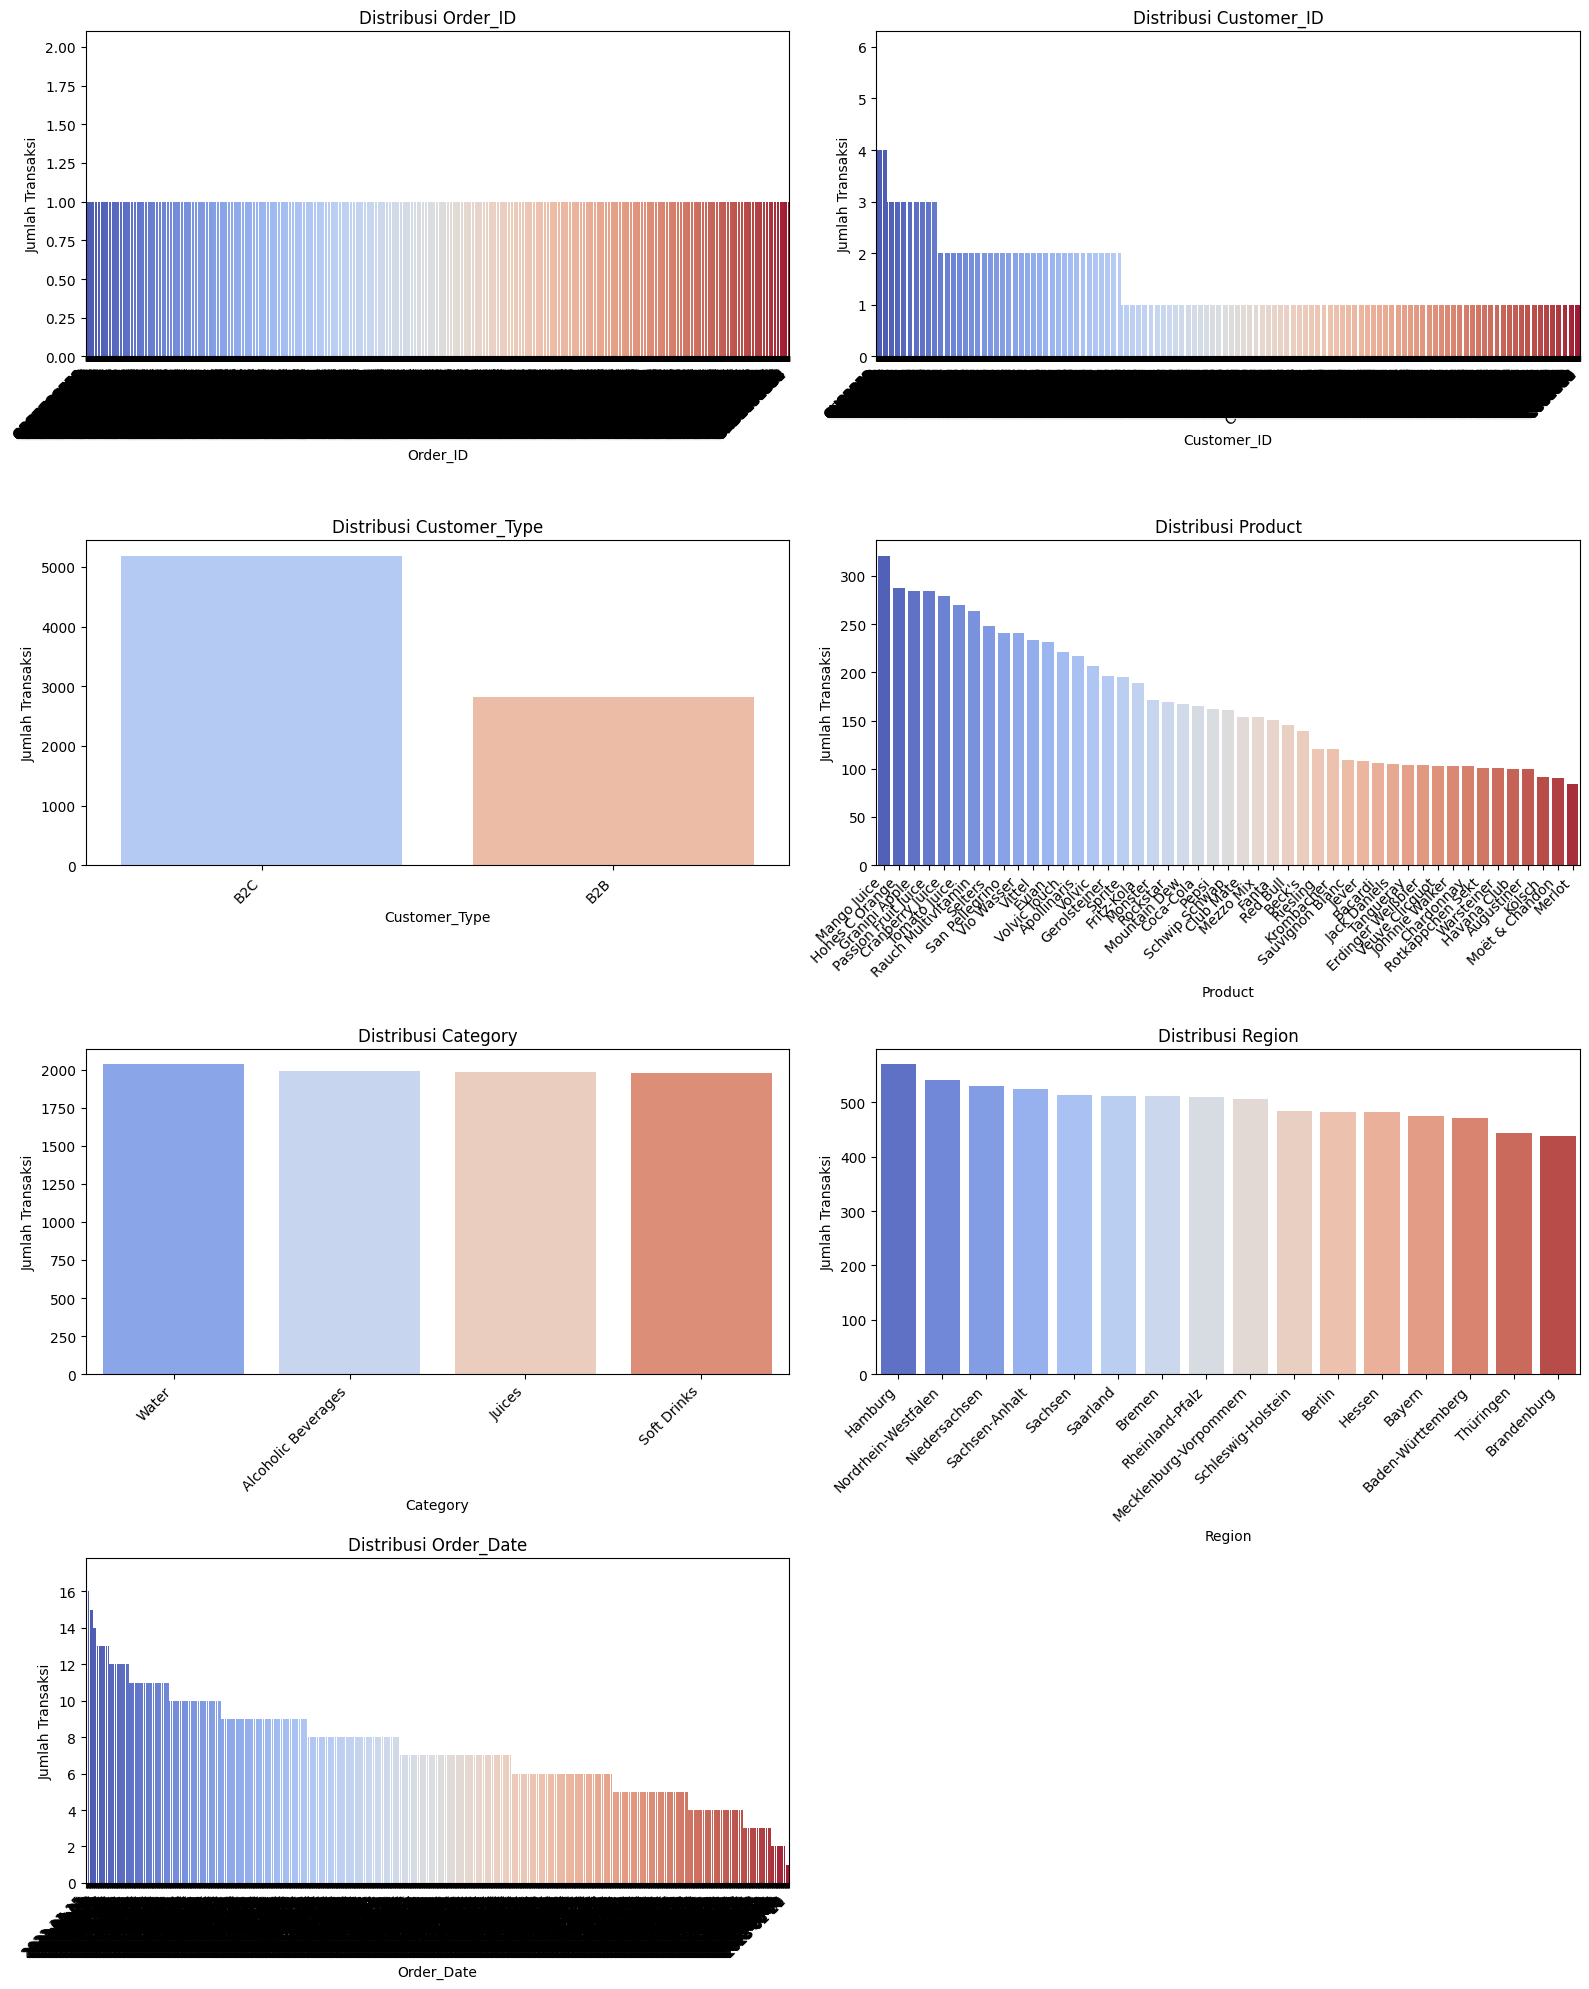

In [11]:
categorical_cols_list = categorical_cols.tolist()

cols_per_row = 2
num_rows = (len(categorical_cols_list) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols_list):
    value_counts = df[col].value_counts().sort_values(ascending=False)
    colors = sns.color_palette("coolwarm", n_colors=len(value_counts))

    sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=axes[i])
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha="right")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Jumlah Transaksi")
    axes[i].set_title(f"Distribusi {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

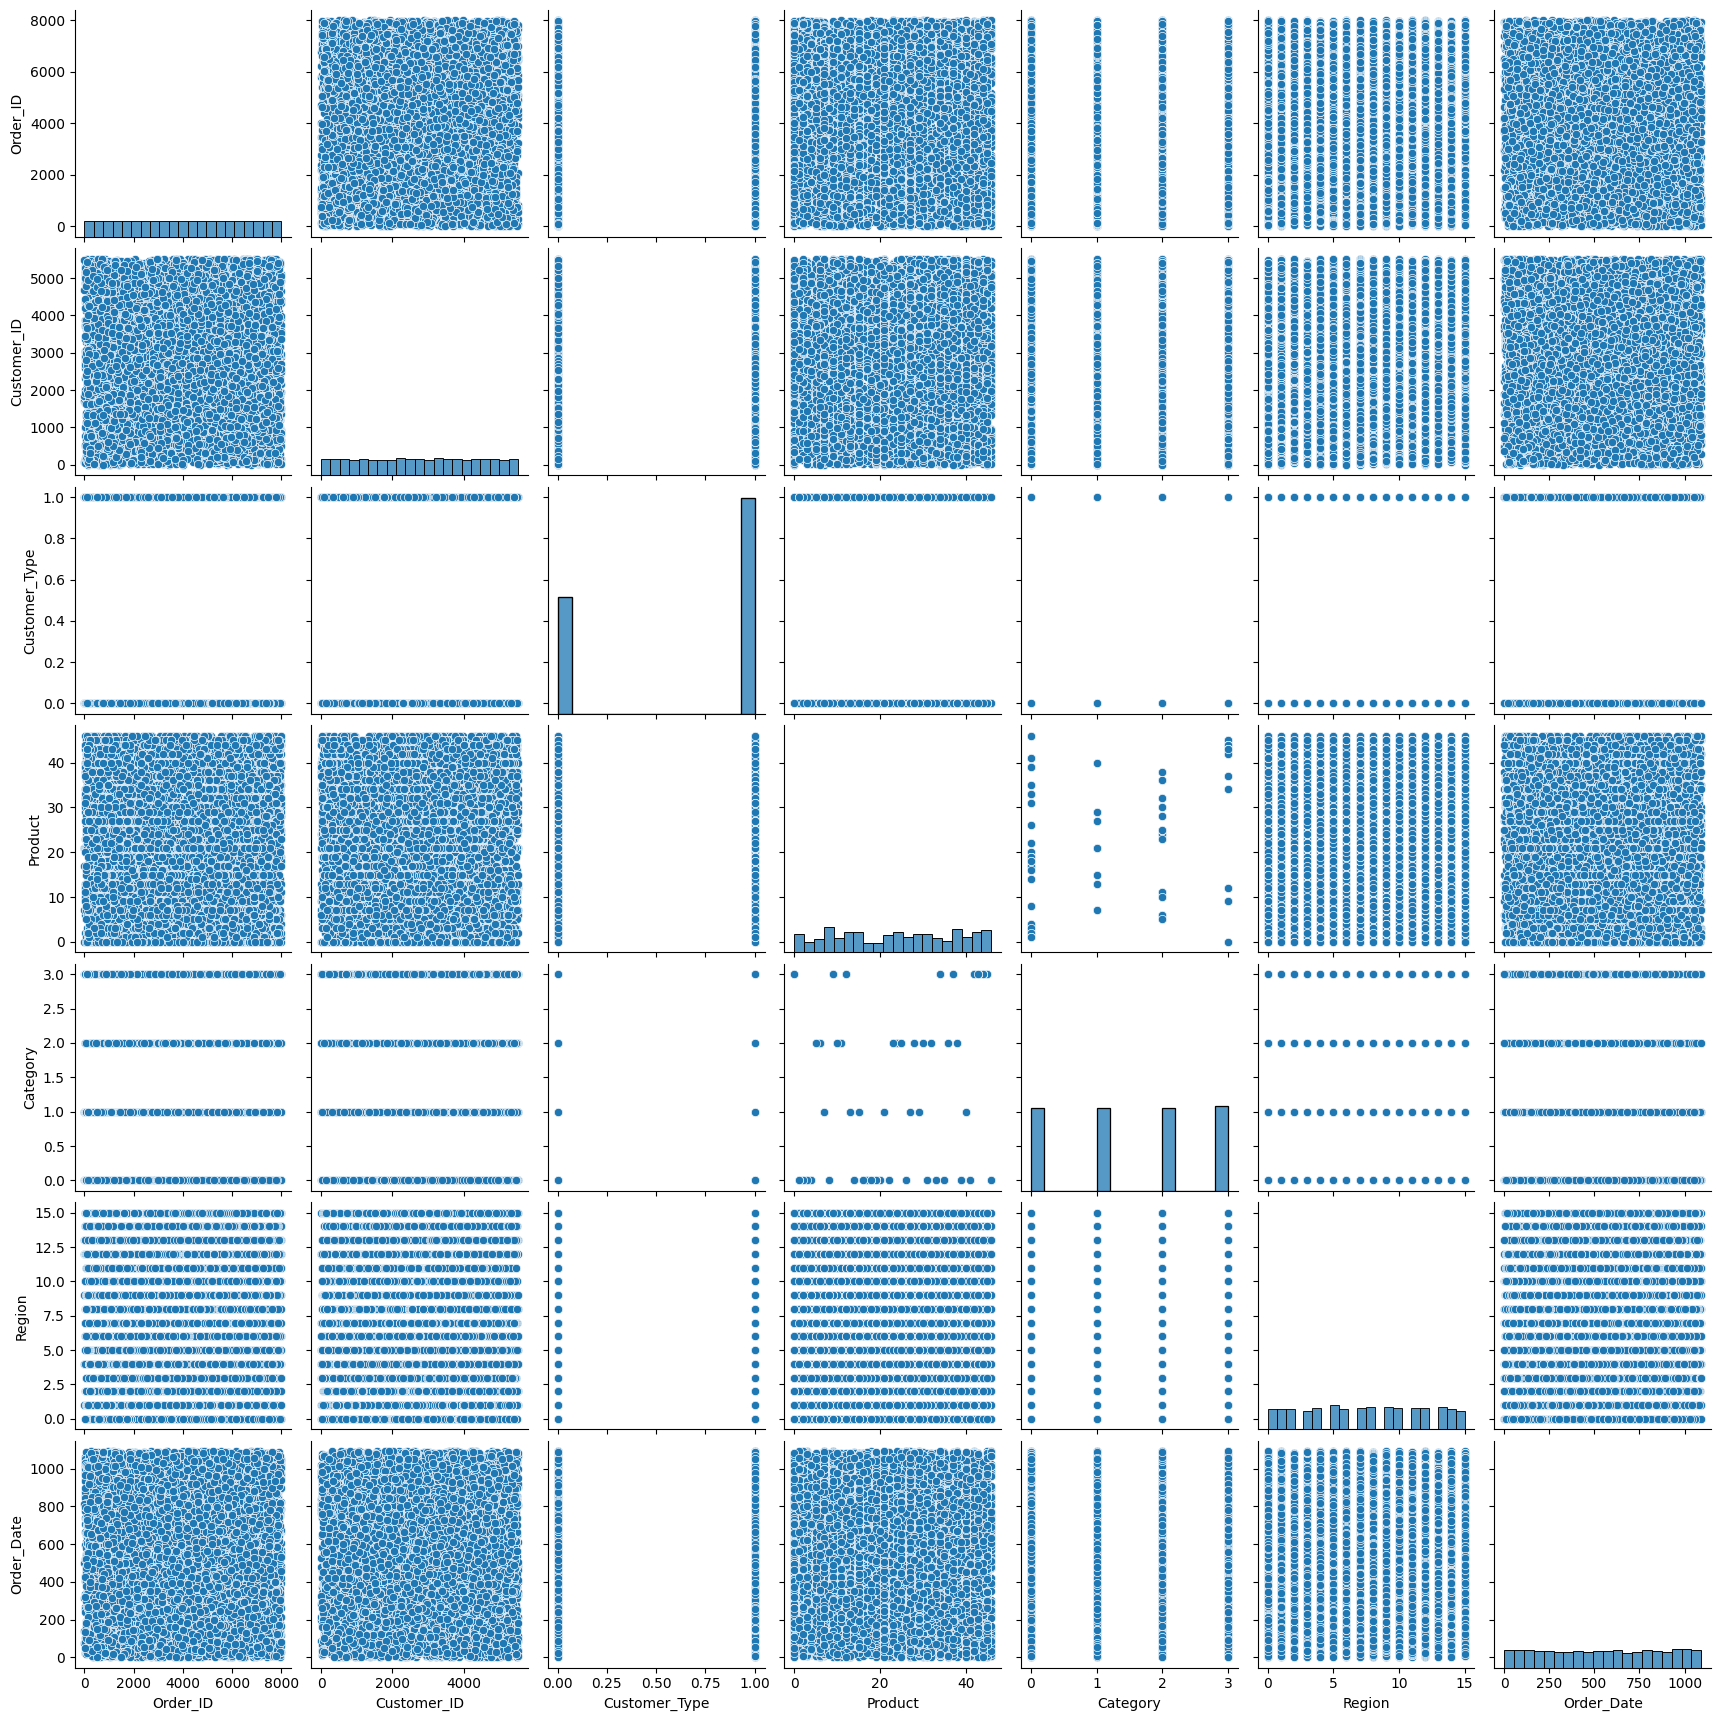

In [12]:
df_transformed = df.copy()

categorical_cols = df_transformed.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
for col in categorical_cols:
    df_transformed[col] = encoder.fit_transform(df_transformed[col])

sns.pairplot(df_transformed[categorical_cols], diag_kind='hist')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [13]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-15-e20b2a332422>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-15-e20b2a332422>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-15-e20b2a332422>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [16]:
selected_features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
data_clustering = df[selected_features]

In [17]:
df['Total_Price_Binned'] = pd.cut(df['Total_Price'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [18]:
k_optimal = 5

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_clustering)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

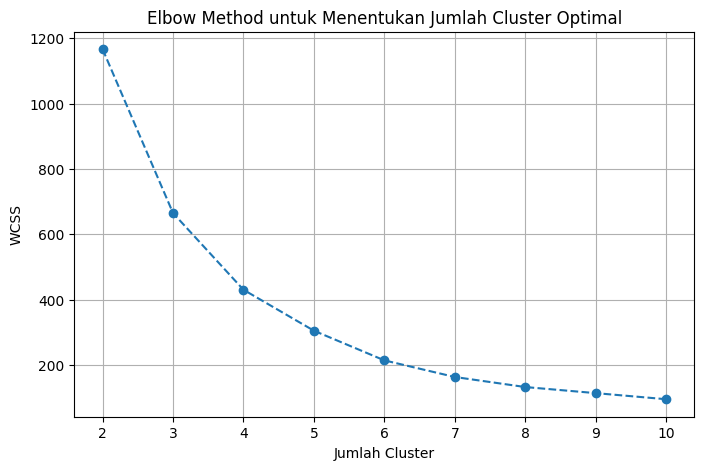

In [19]:
wcss = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
plt.show()

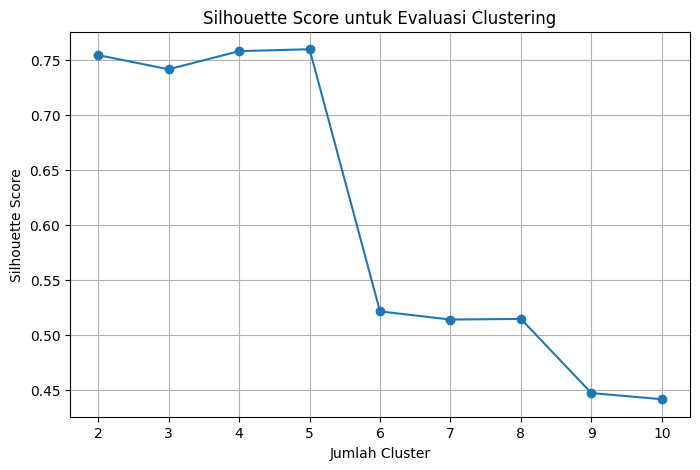

In [20]:
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_clustering)
    silhouette_scores.append(silhouette_score(data_clustering, labels))

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Evaluasi Clustering')
plt.grid(True)
plt.show()

In [21]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_clustering)
    score = silhouette_score(data_clustering, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster = {k}, Silhouette Score: {score:.4f}")

k_optimal = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah Cluster Optimal berdasarkan Silhouette Score: {k_optimal}")

Jumlah Cluster = 2, Silhouette Score: 0.7545
Jumlah Cluster = 3, Silhouette Score: 0.7416
Jumlah Cluster = 4, Silhouette Score: 0.7581
Jumlah Cluster = 5, Silhouette Score: 0.7599
Jumlah Cluster = 6, Silhouette Score: 0.5213
Jumlah Cluster = 7, Silhouette Score: 0.5139
Jumlah Cluster = 8, Silhouette Score: 0.5145
Jumlah Cluster = 9, Silhouette Score: 0.4470
Jumlah Cluster = 10, Silhouette Score: 0.4414

Jumlah Cluster Optimal berdasarkan Silhouette Score: 5


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [22]:
pca = PCA()
data_pca = pca.fit_transform(data_clustering)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Jumlah komponen PCA yang dipilih: {n_components}")

pca = PCA(n_components=n_components)
data_clustering_pca = pca.fit_transform(data_clustering)

silhouette_scores_pca = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_clustering_pca)
    score = silhouette_score(data_clustering_pca, labels)
    silhouette_scores_pca.append(score)
    print(f"Jumlah Cluster = {k}, Silhouette Score setelah PCA: {score:.4f}")

k_optimal_pca = K_range[silhouette_scores_pca.index(max(silhouette_scores_pca))]
print(f"\nJumlah Cluster Optimal berdasarkan Silhouette Score setelah PCA: {k_optimal_pca}")

Jumlah komponen PCA yang dipilih: 2
Jumlah Cluster = 2, Silhouette Score setelah PCA: 0.7689
Jumlah Cluster = 3, Silhouette Score setelah PCA: 0.7616
Jumlah Cluster = 4, Silhouette Score setelah PCA: 0.7811
Jumlah Cluster = 5, Silhouette Score setelah PCA: 0.7862
Jumlah Cluster = 6, Silhouette Score setelah PCA: 0.6179
Jumlah Cluster = 7, Silhouette Score setelah PCA: 0.6153
Jumlah Cluster = 8, Silhouette Score setelah PCA: 0.6155
Jumlah Cluster = 9, Silhouette Score setelah PCA: 0.6094
Jumlah Cluster = 10, Silhouette Score setelah PCA: 0.6032

Jumlah Cluster Optimal berdasarkan Silhouette Score setelah PCA: 5


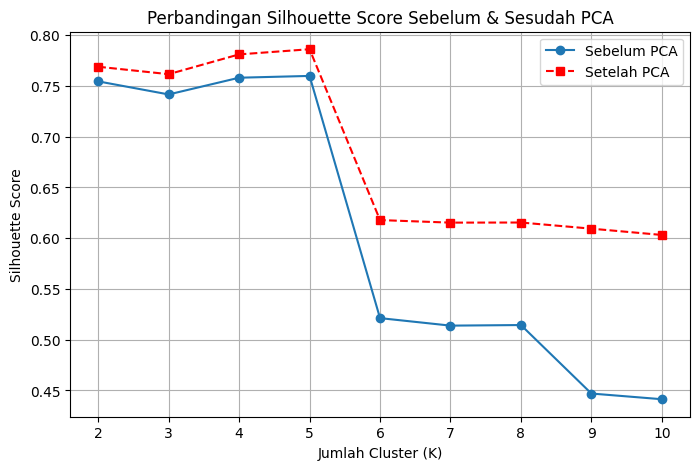

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', label="Sebelum PCA")
plt.plot(K_range, silhouette_scores_pca, marker='s', linestyle='--', label="Setelah PCA", color='red')

plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score Sebelum & Sesudah PCA")
plt.legend()
plt.grid(True)
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

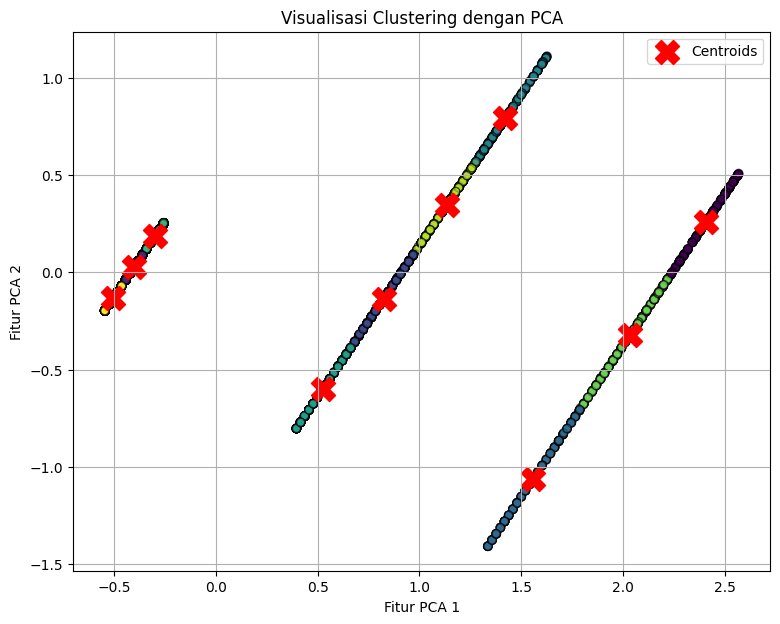

In [24]:
palette = sns.color_palette("husl", len(set(labels)))

plt.figure(figsize=(9, 7))
plt.scatter(data_clustering_pca[:, 0], data_clustering_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='black')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=300, label='Centroids')

plt.title("Visualisasi Clustering dengan PCA")
plt.xlabel("Fitur PCA 1")
plt.ylabel("Fitur PCA 2")
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [25]:
df['Cluster_KMeans'] = kmeans_labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [26]:
for col in categorical_cols:
    df[col] = label_encoders[col].inverse_transform(df[col])

In [27]:
df[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']] = scaler.inverse_transform(
    df[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']]
)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [28]:
numeric_summary_kmeans = df.groupby('Cluster_KMeans')[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']].agg(['mean', 'min', 'max'])
cluster_summary_kmeans = pd.concat([numeric_summary_kmeans], axis=1)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

display(cluster_summary_kmeans)

Unit_Price               Quantity             Discount             Total_Price               
                     mean   min   max       mean   min   max     mean   min   max        mean    min     max
Cluster_KMeans                                                                                              
0                1.617678  0.33  6.28  14.257770   1.0  28.0     0.05  0.05  0.05   22.170658   0.35  150.18
1                1.845524  0.46  5.18   8.027850   1.0  15.0     0.00  0.00  0.00   14.869832   0.46   75.45
2                1.620339  0.35  5.03  47.813559  33.0  61.0     0.10  0.10  0.10   69.338136  13.23  154.71
3                1.494165  0.33  5.28  43.197007  29.0  61.0     0.05  0.05  0.05   61.016658  10.97  152.05
4                1.785169  0.37  6.29  17.595506   1.0  32.0     0.10  0.10  0.10   28.258371   0.61  118.82

Tulis hasil interpretasinya di sini.
1. Cluster 0: Pembeli dengan Produk Harga Terjangkau dan Pembelian Besar
2. Cluster 1: Pembeli dengan Produk Harga Menengah dan Frekuensi Pembelian Rendah
3. Cluster 2: Pembeli dengan Produk Harga Tinggi dan Pembelian Besar
4. Cluster 3: Pembeli dengan Produk Harga Terjangkau dan Pembelian Sedang
5. Cluster 4: Pembeli dengan Produk Harga Menengah dan Diskon Kecil

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

---

## **Cluster 0: Pembeli dengan Produk Harga Terjangkau dan Pembelian Besar**

- **Rata-rata Unit Price**: 1.62 (Min: 0.33, Max: 6.28)
- **Rata-rata Quantity**: 14.26 (Min: 1, Max: 28)
- **Rata-rata Discount**: 0.05 (Min: 0.05, Max: 0.05)
- **Total Penjualan Rata-rata**: 22.17 (Min: 0.35, Max: 150.18)
- **Jumlah anggota**: 3,373

**Analisis**:
- **Unit Price** yang relatif rendah menunjukkan bahwa pelanggan di cluster ini cenderung memilih produk dengan harga lebih murah.
- **Quantity** yang tinggi (rata-rata 14.26) mengindikasikan bahwa mereka cenderung membeli dalam jumlah besar, cocok untuk tujuan distribusi atau bisnis.
- **Discount** yang kecil (0.05) menunjukkan bahwa pelanggan ini tidak banyak mencari diskon besar, mungkin lebih berfokus pada volume pembelian.
- **Total Penjualan** yang rendah namun konsisten menunjukkan pola pembelian grosir dengan transaksi yang lebih besar meskipun harga per unitnya kecil.

**Rekomendasi Strategi**:
- Menawarkan harga grosir atau paket pembelian dalam jumlah besar.
- Meningkatkan loyalitas pelanggan dengan penawaran eksklusif atau program berbasis volume.

---

## **Cluster 1: Pembeli dengan Produk Harga Menengah dan Frekuensi Pembelian Rendah**

- **Rata-rata Unit Price**: 1.85 (Min: 0.46, Max: 5.18)
- **Rata-rata Quantity**: 8.03 (Min: 1, Max: 15)
- **Rata-rata Discount**: 0.00 (Min: 0.00, Max: 0.00)
- **Total Penjualan Rata-rata**: 14.87 (Min: 0.46, Max: 75.45)
- **Jumlah anggota**: 6,366

**Analisis**:
- **Unit Price** lebih tinggi dibandingkan Cluster 0, menunjukkan bahwa pelanggan di cluster ini membeli produk dengan harga yang sedikit lebih tinggi.
- **Quantity** yang rendah (rata-rata 8.03) menunjukkan bahwa mereka melakukan pembelian dengan frekuensi rendah dan sesuai kebutuhan.
- **Discount** yang tidak ada menunjukkan bahwa diskon tidak terlalu memengaruhi keputusan pembelian mereka, mereka lebih memilih untuk membeli produk dengan harga yang wajar.
- **Total Penjualan** yang rendah menunjukkan pembelian yang lebih bersifat personal, bukan untuk distribusi besar.

**Rekomendasi Strategi**:
- Meningkatkan promosi dengan diskon atau bundling produk untuk meningkatkan frekuensi pembelian.
- Fokus pada segmentasi produk yang lebih menarik untuk pelanggan individu.

---

## **Cluster 2: Pembeli dengan Produk Harga Tinggi dan Pembelian Besar**

- **Rata-rata Unit Price**: 1.62 (Min: 0.35, Max: 5.03)
- **Rata-rata Quantity**: 47.81 (Min: 33, Max: 61)
- **Rata-rata Discount**: 0.10 (Min: 0.10, Max: 0.10)
- **Total Penjualan Rata-rata**: 69.34 (Min: 13.23, Max: 154.71)
- **Jumlah anggota**: 261

**Analisis**:
- **Unit Price** sedikit lebih tinggi dibandingkan Cluster 0, tetapi masih dalam kategori harga menengah.
- **Quantity** yang sangat tinggi (rata-rata 47.81) menunjukkan pembelian dalam jumlah besar, sering kali untuk kebutuhan bisnis.
- **Discount** yang lebih tinggi (0.10) menunjukkan adanya kesepakatan diskon atau penawaran khusus yang menarik bagi pembeli.
- **Total Penjualan** yang lebih besar menunjukkan bahwa pembeli ini melakukan transaksi dengan jumlah yang cukup tinggi.

**Rekomendasi Strategi**:
- Menawarkan produk dengan harga menengah yang sesuai dengan kebutuhan pelanggan.
- Memberikan diskon atau penawaran khusus bagi pembeli untuk mendorong pembelian lebih besar.

---

## **Cluster 3: Pembeli dengan Produk Harga Terjangkau dan Pembelian Sedang**

- **Rata-rata Unit Price**: 1.49 (Min: 0.33, Max: 5.28)
- **Rata-rata Quantity**: 43.20 (Min: 29, Max: 61)
- **Rata-rata Discount**: 0.05 (Min: 0.05, Max: 0.05)
- **Total Penjualan Rata-rata**: 61.02 (Min: 10.97, Max: 152.05)
- **Jumlah anggota**: 1,289

**Analisis**:
- **Unit Price** yang relatif rendah menunjukkan preferensi untuk produk dengan harga terjangkau, namun dengan kualitas yang lebih baik.
- **Quantity** yang tinggi (rata-rata 43.20) menunjukkan bahwa pembelian dalam jumlah besar tetap menjadi pilihan bagi pelanggan di cluster ini.
- **Discount** yang kecil (0.05) menunjukkan bahwa pelanggan lebih memilih harga dasar yang lebih terjangkau tanpa tergantung pada diskon.
- **Total Penjualan** yang lebih rendah dibandingkan dengan Cluster 2 tetapi tetap signifikan menunjukkan adanya transaksi besar.

**Rekomendasi Strategi**:
- Fokus pada pengembangan penawaran harga yang lebih kompetitif.
- Tawarkan penawaran dan diskon terbatas untuk meningkatkan volume pembelian.

---

## **Cluster 4: Pembeli dengan Produk Harga Menengah dan Diskon Kecil**

- **Rata-rata Unit Price**: 1.79 (Min: 0.37, Max: 6.29)
- **Rata-rata Quantity**: 17.60 (Min: 1, Max: 32)
- **Rata-rata Discount**: 0.10 (Min: 0.10, Max: 0.10)
- **Total Penjualan Rata-rata**: 28.26 (Min: 0.61, Max: 118.82)
- **Jumlah anggota**: 951

**Analisis**:
- **Unit Price** yang lebih tinggi menunjukkan bahwa pelanggan di cluster ini membeli produk dengan harga menengah.
- **Quantity** yang sedang (rata-rata 17.60) menunjukkan bahwa meskipun mereka tidak membeli dalam jumlah besar seperti di cluster lainnya, mereka tetap membeli produk dalam jumlah yang cukup besar.
- **Discount** yang konsisten (0.10) menunjukkan bahwa mereka mencari nilai tambah dalam bentuk diskon meskipun tidak terlalu besar.
- **Total Penjualan** yang moderat menunjukkan pembelian yang lebih beragam.

**Rekomendasi Strategi**:
- Menawarkan produk dengan harga yang wajar serta diskon yang menarik untuk meningkatkan volume pembelian.
- Fokus pada bisnis kecil hingga menengah yang lebih sensitif terhadap harga dan diskon.

---

## **Kesimpulan**:
Dari hasil segmentasi menggunakan model KMeans, dapat disimpulkan bahwa pelanggan terbagi dalam lima kelompok yang memiliki karakteristik yang berbeda, masing-masing dengan preferensi harga, jumlah pembelian, dan diskon yang unik. Pemahaman terhadap karakteristik setiap cluster akan membantu dalam merumuskan strategi pemasaran dan penjualan yang lebih efektif untuk setiap jenis pelanggan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [31]:
df['Cluster_KMeans'] = kmeans_labels

df_filtered = df[['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Cluster_KMeans']]

df_filtered.to_csv('Dataset_inisiasi.csv', index=False)

print("Dataset_inisiasi.csv telah disimpan.")

Dataset_inisiasi.csv telah disimpan.


In [32]:
from google.colab import files
files.download('Dataset_inisiasi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>